PREDICTING STOCK PRICE USING LSTM AND TENSERFLOW LIBRARIES.
USING A TIME SERIES DATA

LSTM COMES UNDER RECURRENT NEURAL NETWORK.
RNN saves the output of the first prediction and fees it into the next prediction

In [133]:
import math
import pandas_datareader as pdr
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [134]:
key = "7f7adca8ce8c5ee515cbf15bfdb6128d54e67acc"

In [135]:
df = pdr.get_data_tiingo('AAPL' , api_key = key)

<ipython-input-135-be2feee97cdc>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL' , api_key = key)


In [136]:
df.head(5)

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2018-07-17 00:00:00+00:00  191.45  191.87  189.20  189.75  15534523   
       2018-07-18 00:00:00+00:00  190.40  191.80  189.93  191.78  16393381   
       2018-07-19 00:00:00+00:00  191.88  192.55  189.69  189.69  20286752   
       2018-07-20 00:00:00+00:00  191.44  192.43  190.17  191.78  20706042   
       2018-07-23 00:00:00+00:00  191.61  191.96  189.56  190.68  15989365   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2018-07-17 00:00:00+00:00  45.737155  45.837492  45.199633  45.331027   
       2018-07-18 00:00:00+00:00  45.486311  45.820769  45.374029  45.815991   
       2018-07-19 00:00:00+00:00  45.839881  45.999943  45.316693  45.316693   
       2018-07-20 00:00:00+00:00  45.734766  45.971275  45.431364  45.815991   
       2018-07-23 00:00:00+00:00  45.775378  45.858993  45.285636  45.553203   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2018-07-17 00:00:00+00:00   62138092      0.0          1.0  
       2018-07-18 00:00:00+00:00   65573524      0.0          1.0  
       2018-07-19 00:00:00+00:00   81147008      0.0          1.0  
       2018-07-20 00:00:00+00:00   82824168      0.0          1.0  
       2018-07-23 00:00:00+00:00   63957460      0.0          1.0

In [137]:
df.to_csv('AAPL.csv')

In [138]:
df = pd.read_csv('AAPL.csv')

In [139]:
df.tail(5)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2023-07-10 00:00:00+00:00,188.61,189.9900,187.035,189.26,59922163,188.61,189.9900,187.035,189.26,59922163,0.0,1.0
1253,AAPL,2023-07-11 00:00:00+00:00,188.08,189.3000,186.600,189.16,46638119,188.08,189.3000,186.600,189.16,46638119,0.0,1.0
1254,AAPL,2023-07-12 00:00:00+00:00,189.77,191.7000,188.470,189.68,60750248,189.77,191.7000,188.470,189.68,60750248,0.0,1.0
1255,AAPL,2023-07-13 00:00:00+00:00,190.54,191.1900,189.780,190.50,41342338,190.54,191.1900,189.780,190.50,41342338,0.0,1.0
1256,AAPL,2023-07-14 00:00:00+00:00,190.69,191.1799,189.630,190.23,41616242,190.69,191.1799,189.630,190.23,41616242,0.0,1.0


PREDICTING ON CLOSE FEATURE

In [140]:
dfnew = df.reset_index()['close']

In [141]:
dfnew

0       191.45
1       190.40
2       191.88
3       191.44
4       191.61
         ...  
1252    188.61
1253    188.08
1254    189.77
1255    190.54
1256    190.69
Name: close, Length: 1257, dtype: float64

In [142]:
dfnew.shape

(1257,)

In [143]:
import matplotlib.pyplot as plt

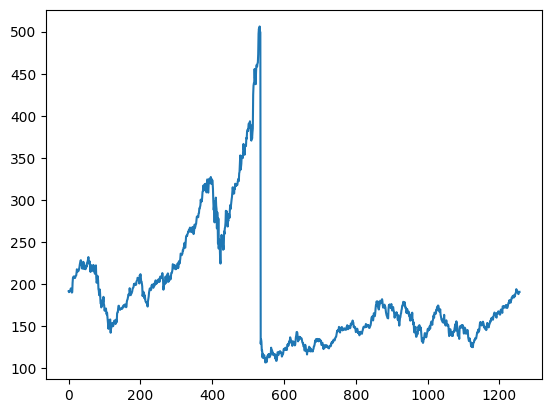

In [144]:
plt.plot(dfnew)

LSTM are very much sensitive to the scale of the data. so we apply MinMax scaler

In [145]:
scaler = MinMaxScaler(feature_range=(0,1))
dfnew = scaler.fit_transform(np.array(dfnew).reshape(-1,1))

In [146]:
dfnew

array([[0.21192235],
       [0.20929242],
       [0.21299937],
       ...,
       [0.20771446],
       [0.20964308],
       [0.21001879]])

VALUES CONVERTED TO THE RANGE OF (0,1)

TIME SERIES DATA IS DIVIDED IN TRAIN AND TEST DATA SET ACCORDING TO THE DATE

In [147]:
training_size = int(len(dfnew)*0.65)
test_size = len(dfnew) - training_size

dividing the dataset in train and test data.
train data = 65 %
test data = 35 %

In [148]:
train_data,test_data = dfnew[0:training_size,:], dfnew[training_size:len(dfnew),:1]

In [149]:
len(train_data)

817

In [150]:
len(test_data)

440

In [151]:
train_data

array([[2.11922354e-01],
       [2.09292423e-01],
       [2.12999374e-01],
       [2.11897307e-01],
       [2.12323106e-01],
       [2.15804634e-01],
       [2.20363181e-01],
       [2.18835316e-01],
       [2.10745147e-01],
       [2.08065122e-01],
       [2.09016907e-01],
       [2.37094552e-01],
       [2.51847214e-01],
       [2.53350031e-01],
       [2.56055103e-01],
       [2.51145899e-01],
       [2.51496556e-01],
       [2.55579211e-01],
       [2.52197871e-01],
       [2.55554164e-01],
       [2.57758297e-01],
       [2.58985598e-01],
       [2.66700063e-01],
       [2.77370069e-01],
       [2.72060113e-01],
       [2.71008140e-01],
       [2.71033187e-01],
       [2.72135254e-01],
       [2.73813400e-01],
       [2.78271760e-01],
       [2.82680025e-01],
       [2.90895429e-01],
       [2.96030056e-01],
       [3.02542267e-01],
       [3.04370695e-01],
       [3.00638698e-01],
       [2.91195992e-01],
       [2.86687539e-01],
       [2.79248591e-01],
       [2.93074515e-01],


TIMESTEPS - THE NUMBER OF PREVIOUS RESULTS CONSIDER TO PREDICT THE OUTPUT.
FOR EG : IF TIMESTEP IS 3 THIS MEANS MODEL WILL SEE THE OUTPUT OF PREVIOUS 3 DAYS AND PREDICT THE NEW OUTPUT

NOW CONVERTING AN ARRAY OF VALUES INTO A DATA MATRIX

In [152]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

reshape into X=t,t+1,t+2,t+3 and Y=t+4

In [153]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [154]:
print(X_train.shape), print(y_train.shape)


(716, 100)
(716,)


(None, None)

In [155]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

# reshape input to be [samples, time steps, features] which is required for LSTM

ADDING 1 THAT IS LAST PARAMETER OF RESHAPE() FUNCTION IS USE TO MAKE THE THE MATRIX 3 DIMENSIONAL

In [156]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

# STACKED LSTM MODEL

In [157]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [158]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))   # 50 signifies the hidden layers
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [159]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [160]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 244ms/step - loss: 0.0364 - val_loss: 8.1378e-04
Epoch 2/100
12/12 [==============================] - 2s 140ms/step - loss: 0.0132 - val_loss: 0.0025
Epoch 3/100
12/12 [==============================] - 2s 129ms/step - loss: 0.0102 - val_loss: 3.9083e-04
Epoch 4/100
12/12 [==============================] - 2s 152ms/step - loss: 0.0088 - val_loss: 3.3031e-04
Epoch 5/100
12/12 [==============================] - 2s 197ms/step - loss: 0.0072 - val_loss: 6.9763e-04
Epoch 6/100
12/12 [==============================] - 2s 141ms/step - loss: 0.0094 - val_loss: 0.0013
Epoch 7/100
12/12 [==============================] - 2s 146ms/step - loss: 0.0064 - val_loss: 7.0318e-04
Epoch 8/100
12/12 [==============================] - 2s 137ms/step - loss: 0.0055 - val_loss: 4.0306e-04
Epoch 9/100
12/12 [==============================] - 2s 139ms/step - loss: 0.0045 - val_loss: 3.2488e-04
Epoch 10/100
12/12 [==============================] - 2s 141ms/

In [161]:
import tensorflow as tf

In [162]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 27ms/step


#transforming bac to non scaler form

In [163]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

#RMSE

In [164]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

222.82032826512767

In [165]:
math.sqrt(mean_squared_error(ytest,test_predict))

156.2863014074532

### Plotting
# shift train predictions for plotting

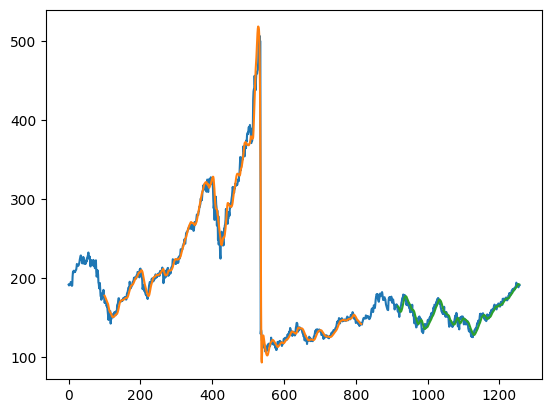

In [166]:
look_back=100
trainpredictplot = np.empty_like(dfnew)
trainpredictplot[:, :] = np.nan
trainpredictplot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testpredictplot = np.empty_like(dfnew)
testpredictplot[:, :] = np.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(dfnew)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dfnew))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()

BLUE - DATASET

ORANGE - PREDICTIONS (TRAIN DATA)


GREEN - OUTPUT (TEST DATA)

In [167]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [168]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [169]:
temp_input

[0.10429555416405756,
 0.10537257357545393,
 0.10659987476518468,
 0.09986224170319347,
 0.10289292423293667,
 0.10161552911709448,
 0.09635566687539132,
 0.09785848465873509,
 0.11068252974326859,
 0.11769567939887288,
 0.11211020663744514,
 0.11529117094552283,
 0.1095804633688165,
 0.10434564809016905,
 0.10927989981214775,
 0.11458985597996241,
 0.11559173450219157,
 0.12275516593613017,
 0.1206261740763932,
 0.12663744520976827,
 0.13134627426424544,
 0.12771446462116465,
 0.13046963055729488,
 0.13377582968065116,
 0.12884157795867246,
 0.12726361928616153,
 0.13507827175954912,
 0.13906073888541015,
 0.1454226675015654,
 0.14860363180964303,
 0.14725109580463364,
 0.14256731371321218,
 0.14482154038822787,
 0.13823418910457103,
 0.13515341264871633,
 0.1334001252348152,
 0.14707576706324355,
 0.14619912335629304,
 0.14624921728240442,
 0.14935504070131495,
 0.15226048841577955,
 0.14980588603631806,
 0.14572323105823415,
 0.14649968691296178,
 0.14259236067626796,
 0.14256731371

logic to pass the data of previous 100 days and predicting the output for next 30 days

In [170]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):      # 30 = predicting output for next 30 days
  if(len(temp_input)>100):
    #print(temp_input)
    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input=x_input.reshape((1,n_steps,1))
    #print(x_input)
    yhat=model.predict(x_input,verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    #print(temp_input)
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    x_input=x_input.reshape((1,n_steps,1))
    yhat=model.predict(x_input,verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())     #adding output to input list to maintain the size. so when the next figure is taken that shoud also be taken as a batch of 100 figures
    print(len(temp_input))
    lst_output.extend(yhat.tolist())        #adding output in output list
    i=i+1

print(lst_output)

[0.2119449]
101
1 day input [0.10537257 0.10659987 0.09986224 0.10289292 0.10161553 0.09635567
 0.09785848 0.11068253 0.11769568 0.11211021 0.11529117 0.10958046
 0.10434565 0.1092799  0.11458986 0.11559173 0.12275517 0.12062617
 0.12663745 0.13134627 0.12771446 0.13046963 0.13377583 0.12884158
 0.12726362 0.13507827 0.13906074 0.14542267 0.14860363 0.1472511
 0.14256731 0.14482154 0.13823419 0.13515341 0.13340013 0.14707577
 0.14619912 0.14624922 0.14935504 0.15226049 0.14980589 0.14572323
 0.14649969 0.14259236 0.14256731 0.15421415 0.15739512 0.15716969
 0.15453976 0.15180964 0.14765185 0.16713838 0.16696306 0.16262993
 0.16710081 0.16758923 0.16463369 0.16338134 0.16338134 0.16493425
 0.17084534 0.17112085 0.16871634 0.16210394 0.16280526 0.16568566
 0.17179712 0.1764809  0.17635567 0.183469   0.18562304 0.18219161
 0.18126487 0.17778334 0.18467126 0.18564809 0.19273638 0.19153413
 0.19313713 0.19829681 0.19556669 0.19579211 0.19316218 0.20077646
 0.19997495 0.19644333 0.20343143 0

In [171]:
day_new=np.arange(1,101)    #data is of 100 days
day_pred=np.arange(101,131)   #prediction is to be done for 30 days

In [172]:
dfnewnew=dfnew.tolist()
dfnewnew.extend(lst_output)

In [173]:
len(dfnew)


1257

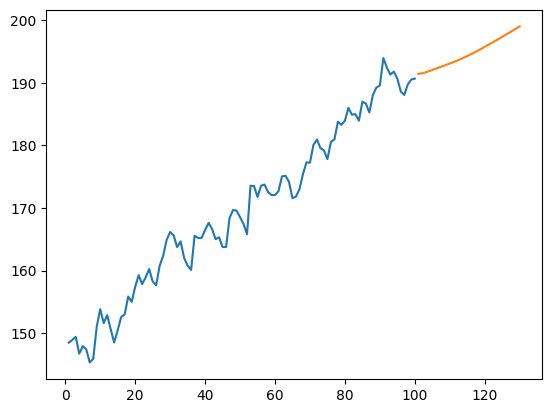

In [174]:
plt.plot(day_new,scaler.inverse_transform(dfnew[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

COMBINED PREDICTION OF 30 DAYS

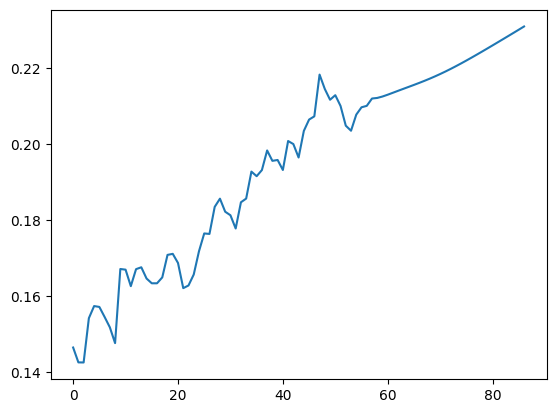

In [175]:
dfnewnew=dfnew.tolist()
dfnewnew.extend(lst_output)
plt.plot(dfnewnew[1200:])

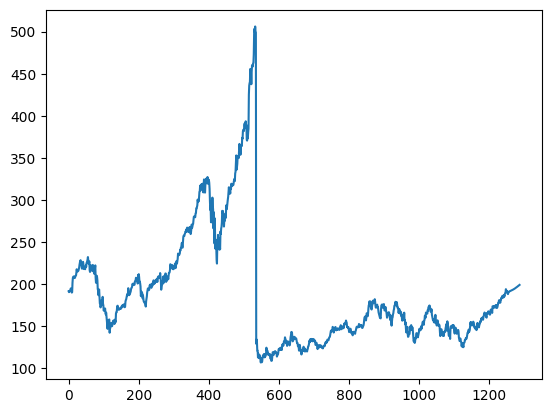

In [176]:
dfnewnew=scaler.inverse_transform(dfnewnew).tolist()
plt.plot(dfnewnew)

#FINAL RESULT OF PREDICTING APPLE STOCK PRICE FOR NEXT 30 DAYS